학습목표

미니배치 경사하강법(Minibatch Gradient descent)를 배우고 Dataset & DataLoader 사용법에 대해 알아본다.

핵심키워드
* 다항 선형 회귀(Multivariable Linear regression)
* 미니배치 경사하강법(Minibatch Gradient descent)
* Dataset, DataLoader

## Mini-batch Gradient Descent

개념: 한 에폭마다가 아니라 각 미니배치에 대해 loss값 구할 때마다 gradient descent를 하는 것
* 장점:
    * 컴퓨터에 무리가 덜간다.
    * 파라미터 업데이트를 더 빠르게 할 수 있다.
* 단점:
    * 전체 데이터를 쓰지 않아 잘못된 방향으로 업데이트를 할 수도 있다.

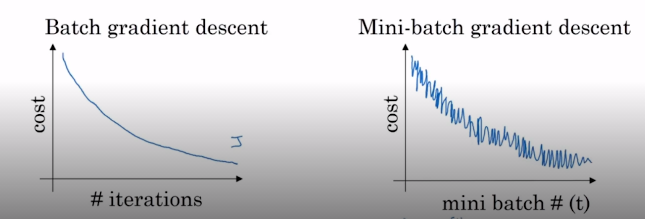

## Pytorch Dataset

dataset 마련

In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):  # torch.utils.data.Dataset 상속
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 98],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
    
    # 이 데이터셋의 총 데이터 수
    def __len__(self):
        return len(self.x_data)
    
    # 어떠한 인덱스(idx)를 받았을 때, 그에 상응하는 입출력 데이터 반환
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        
        return x, y
    
dataset = CustomDataset()

앞에서 마련한 dataset을 dataloader에 로드시키기

In [ ]:
from torch.utils.data import DataLoader

dataloader = Dataloader(
    dataset,
    batch_size = 2,  # 각 미니배치의 크기, 통상적으로 2의 제곱수로 설정
    shuffle = True  # Epoch마다 데이터의 순서를 섞어서 순서를 학습하는 것을 예방
    )

## Full code w/ Dataset & Dataloader

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import optim
from torch import nn
from torch.nn import functional as F

# 데이터셋 만들기
class CustomDataset(Dataset):  # torch.utils.data.Dataset 상속
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 98],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
    
    # 이 데이터셋의 총 데이터 수
    def __len__(self):
        return len(self.x_data)
    
    # 어떠한 인덱스(idx)를 받았을 때, 그에 상응하는 입출력 데이터 반환
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

dataset = CustomDataset()

dataloader = DataLoader(
    dataset,
    batch_size = 2,
    shuffle = True  # 웬만하면 True로 설정해주는 것이 좋다.
    )

# 모델 불러오기
class MultivariateLinearRegressionModel(nn.Module):
    # 대충 여기서 x_train과 행렬곱할 W의 shape 정해주는 듯
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)
    # 여기서 모델이 어떻게 연산을 수행할 것인지 정해줌
    def forward(self, x):
        return self.linear(x)
    
# 모델 호출(not 파라미터 초기화 anymore)
model = MultivariateLinearRegressionModel()

# optimizer 정의
optimizer = optim.SGD(model.parameters(), lr = 1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        # 예측값(H(x)) 계산
        prediction = model(x_train)
        # loss값 계산
        loss = F.mse_loss(prediction, y_train)
        # loss로 파라미터 갱신
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        print('Epoch {:1d}/{} Batch {}/{} Loss {:.6f}'.format(epoch, nb_epochs, batch_idx, len(dataloader), loss.item()))
        

C:\Users\SGI\anaconda3\lib\site-packages\torch\autograd\__init__.py:132: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


Epoch 0/20 Batch 0/3 Loss 51532.820312
Epoch 0/20 Batch 1/3 Loss 6903.320312
Epoch 0/20 Batch 2/3 Loss 5187.363281
Epoch 1/20 Batch 0/3 Loss 746.608398
Epoch 1/20 Batch 1/3 Loss 511.343842
Epoch 1/20 Batch 2/3 Loss 153.818893
Epoch 2/20 Batch 0/3 Loss 19.911619
Epoch 2/20 Batch 1/3 Loss 11.779579
Epoch 2/20 Batch 2/3 Loss 0.302705
Epoch 3/20 Batch 0/3 Loss 0.899888
Epoch 3/20 Batch 1/3 Loss 0.415677
Epoch 3/20 Batch 2/3 Loss 5.223195
Epoch 4/20 Batch 0/3 Loss 1.408537
Epoch 4/20 Batch 1/3 Loss 2.146490
Epoch 4/20 Batch 2/3 Loss 0.053193
Epoch 5/20 Batch 0/3 Loss 0.006139
Epoch 5/20 Batch 1/3 Loss 1.955423
Epoch 5/20 Batch 2/3 Loss 1.482229
Epoch 6/20 Batch 0/3 Loss 2.221536
Epoch 6/20 Batch 1/3 Loss 0.765782
Epoch 6/20 Batch 2/3 Loss 0.526475
Epoch 7/20 Batch 0/3 Loss 2.488203
Epoch 7/20 Batch 1/3 Loss 0.422146
Epoch 7/20 Batch 2/3 Loss 0.901596
Epoch 8/20 Batch 0/3 Loss 2.675476
Epoch 8/20 Batch 1/3 Loss 1.032683
Epoch 8/20 Batch 2/3 Loss 0.175221
Epoch 9/20 Batch 0/3 Loss 0.655930
Ep

* enumerate(dataloader): mini-batch idx와 x_train,y_train으로 구성된 데이터(samples)를 받음
* len(dataloader): 한 epoch당 mini-batch의 개수


다음 시간 예고: 지금까지 어떤 숫자 하나를 예측하는 모델을 만들었다.
그렇다면 분류를 하는 모델은 어떻게 만들 수 있을까